In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"C:\Users\katha\OneDrive\Documents\EDA\train_LZdllcl.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [3]:
df.drop('employee_id', axis=1 ,inplace = True)

In [4]:
df.drop('region', axis=1 ,inplace = True)

In [5]:
df.drop('recruitment_channel', axis=1 ,inplace = True)

In [6]:
df.keys()

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
df.isnull().sum()

department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  object 
 1   education             48660 non-null  object 
 2   gender                48660 non-null  object 
 3   no_of_trainings       48660 non-null  int64  
 4   age                   48660 non-null  int64  
 5   previous_year_rating  48660 non-null  float64
 6   length_of_service     48660 non-null  int64  
 7   KPIs_met >80%         48660 non-null  int64  
 8   awards_won?           48660 non-null  int64  
 9   avg_training_score    48660 non-null  int64  
 10  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 4.5+ MB


In [10]:
df['age'] = pd.to_numeric(df['age'])  # 'coerce' will convert non-numeric values to NaN

In [23]:
#Early Career = 1
#Mid-Career = 2
#Established Professionals = 3
#Experienced Leaders = 4

age_catagory = []
for row in df['age']:
        if row < 30:   age_catagory.append('1')
        elif row < 40:  age_catagory.append('2')
        elif row <18:  age_catagory.append('3')
            
        else:           age_catagory.append('4')
df['age_catagory'] = age_catagory
df.tail() 

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory
54802,Sales & Marketing,Bachelor's,m,2,31,1,2,0,0,49,0,2,1,1
54803,Technology,Bachelor's,m,1,48,3,17,0,0,78,0,4,3,4
54804,Operations,Master's & above,f,1,37,2,6,0,0,56,0,2,1,2
54805,Analytics,Bachelor's,m,1,27,5,3,1,0,79,0,1,3,1
54807,HR,Bachelor's,m,1,27,1,5,0,0,49,0,1,1,1


In [12]:
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [13]:
df

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_catagory
0,Sales & Marketing,Master's & above,f,1,35,5,8,1,0,49,0,Mid-Career
1,Operations,Bachelor's,m,1,30,5,4,0,0,60,0,Mid-Career
2,Sales & Marketing,Bachelor's,m,1,34,3,7,0,0,50,0,Mid-Career
3,Sales & Marketing,Bachelor's,m,2,39,1,10,0,0,50,0,Mid-Career
4,Technology,Bachelor's,m,1,45,3,2,0,0,73,0,Experienced Leaders
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,Bachelor's,m,2,31,1,2,0,0,49,0,Mid-Career
54803,Technology,Bachelor's,m,1,48,3,17,0,0,78,0,Experienced Leaders
54804,Operations,Master's & above,f,1,37,2,6,0,0,56,0,Mid-Career
54805,Analytics,Bachelor's,m,1,27,5,3,1,0,79,0,Early Career


In [21]:
#poor = 1
#Below Average = 2
#Average = 3
#Above Average = 4
#Excellent = 5


avg_training_score_catagory = []
for row in df['avg_training_score']:
        if row < 60:   avg_training_score_catagory.append('1')
        elif row < 70:  avg_training_score_catagory.append('2')
        elif row < 80:  avg_training_score_catagory.append('3')
        elif row < 90:  avg_training_score_catagory.append('4')
            
        else:           avg_training_score_catagory.append('5')
df['avg_training_score_catagory'] = avg_training_score_catagory
df.head() 

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory
0,Sales & Marketing,Master's & above,f,1,35,5,8,1,0,49,0,Mid-Career,1,2
1,Operations,Bachelor's,m,1,30,5,4,0,0,60,0,Mid-Career,2,1
2,Sales & Marketing,Bachelor's,m,1,34,3,7,0,0,50,0,Mid-Career,1,2
3,Sales & Marketing,Bachelor's,m,2,39,1,10,0,0,50,0,Mid-Career,1,2
4,Technology,Bachelor's,m,1,45,3,2,0,0,73,0,Experienced Leaders,3,1


In [20]:
#Novice = 1
#Intermediate = 2
#Advanced = 3
#Expert = 4


length_of_service_catagory = []
for row in df['length_of_service']:
        if row <= 5:   length_of_service_catagory.append('1')
        elif row <= 10:  length_of_service_catagory.append('2')
        elif row <= 15:  length_of_service_catagory.append('3')
            
        else:           length_of_service_catagory.append('4')
df['length_of_service_catagory'] = length_of_service_catagory
df.head() 

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory
0,Sales & Marketing,Master's & above,f,1,35,5,8,1,0,49,0,Mid-Career,Poor,2
1,Operations,Bachelor's,m,1,30,5,4,0,0,60,0,Mid-Career,Below Average,1
2,Sales & Marketing,Bachelor's,m,1,34,3,7,0,0,50,0,Mid-Career,Poor,2
3,Sales & Marketing,Bachelor's,m,2,39,1,10,0,0,50,0,Mid-Career,Poor,2
4,Technology,Bachelor's,m,1,45,3,2,0,0,73,0,Experienced Leaders,Average,1


In [25]:

df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory
0,Sales & Marketing,Master's & above,f,1,35,5,8,1,0,49,0,2,1,2
1,Operations,Bachelor's,m,1,30,5,4,0,0,60,0,2,2,1
2,Sales & Marketing,Bachelor's,m,1,34,3,7,0,0,50,0,2,1,2
3,Sales & Marketing,Bachelor's,m,2,39,1,10,0,0,50,0,2,1,2
4,Technology,Bachelor's,m,1,45,3,2,0,0,73,0,4,3,1


In [27]:
df.drop(['age','length_of_service','avg_training_score'], axis=1, inplace=True)

In [28]:
df.head()

,department,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory
0,Sales & Marketing,Master's & above,f,1,5,1,0,0,2,1,2
1,Operations,Bachelor's,m,1,5,0,0,0,2,2,1
2,Sales & Marketing,Bachelor's,m,1,3,0,0,0,2,1,2
3,Sales & Marketing,Bachelor's,m,2,1,0,0,0,2,1,2
4,Technology,Bachelor's,m,1,3,0,0,0,4,3,1


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [32]:
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

In [33]:
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df['department_encoded'] = label_encoder.fit_transform(df['department'])


In [37]:
df.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted,age_catagory,avg_training_score_catagory,length_of_service_catagory,gender_encoded,education_encoded,department_encoded
0,1,5,1,0,0,2,1,2,0,2,7
1,1,5,0,0,0,2,2,1,1,0,4
2,1,3,0,0,0,2,1,2,1,0,7
3,2,1,0,0,0,2,1,2,1,0,7
4,1,3,0,0,0,4,3,1,1,0,8


In [36]:
df.drop(['department','education','gender'], axis=1, inplace=True)

## Spliting the dataset into train and test set (MAIN DATASET)

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
X = df[[ 'department_encoded', 'education_encoded', 'gender_encoded', 'no_of_trainings', 'age_catagory', 'previous_year_rating',
       'length_of_service_catagory', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score_catagory' ]]

In [40]:
y = df[['is_promoted']]

In [41]:
X = pd.DataFrame(X)

In [42]:
y = pd.DataFrame(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.75)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36495 entries, 18008 to 3106
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   department_encoded           36495 non-null  int32 
 1   education_encoded            36495 non-null  int32 
 2   gender_encoded               36495 non-null  int32 
 3   no_of_trainings              36495 non-null  int64 
 4   age_catagory                 36495 non-null  object
 5   previous_year_rating         36495 non-null  int32 
 6   length_of_service_catagory   36495 non-null  object
 7   KPIs_met >80%                36495 non-null  int64 
 8   awards_won?                  36495 non-null  int64 
 9   avg_training_score_catagory  36495 non-null  object
dtypes: int32(4), int64(3), object(3)
memory usage: 2.5+ MB


In [ ]:
X_test.info()

## standerdize the data

In [45]:
#Now standerdize the value tp make them between o to 1 
#using standard scaler or minmax scaler
#from sklearn.preprocessing import MinMaxScaler
#however i am gonna use standard scaler
from sklearn.preprocessing import StandardScaler

In [46]:
#first fit then transform train data
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
scaled_train_data=scaler.transform(X_train)

In [48]:
scaled_train_data

array([[ 0.81875203, -0.67260057,  0.66048889, ..., -0.74518127,
        -0.15226966, -0.89666174],
       [-0.38796623, -0.67260057,  0.66048889, ..., -0.74518127,
        -0.15226966, -0.06063726],
       [ 1.22099146, -0.67260057,  0.66048889, ...,  1.34195537,
        -0.15226966,  1.6114117 ],
       ...,
       [-0.38796623, -0.67260057, -1.51403001, ..., -0.74518127,
        -0.15226966, -0.06063726],
       [-0.38796623, -0.67260057,  0.66048889, ...,  1.34195537,
        -0.15226966, -0.89666174],
       [-0.38796623,  1.50418814, -1.51403001, ..., -0.74518127,
         6.5672965 ,  2.44743618]])

In [49]:
#fit then transform test data
scaler.fit(X_test)

StandardScaler()

In [50]:
scaled_test_data=scaler.transform(X_test)

In [51]:
scaled_test_data

array([[ 0.82189736, -0.6707641 ,  0.66408527, ..., -0.74153824,
        -0.15873892, -0.90380507],
       [ 0.82189736,  1.50490455, -1.50583073, ..., -0.74153824,
        -0.15873892, -0.90380507],
       [-0.38802334, -0.6707641 , -1.50583073, ...,  1.34854812,
        -0.15873892, -0.06782661],
       ...,
       [-0.38802334, -0.6707641 ,  0.66408527, ..., -0.74153824,
        -0.15873892, -0.90380507],
       [ 1.22520426, -0.6707641 , -1.50583073, ..., -0.74153824,
        -0.15873892,  0.76815184],
       [-2.00125095, -0.6707641 ,  0.66408527, ..., -0.74153824,
        -0.15873892,  1.6041303 ]])

## Apply PCA to find the principal components (fit and transform the train set and test set)

In [52]:
# import PCA from sklearn.decomposiotion
from sklearn.decomposition import PCA

In [55]:
#define how many of dimention you want
pca=PCA(n_components=5)

In [56]:
#again fit and transform the scaled data
pca.fit(scaled_train_data)

PCA(n_components=5)

In [57]:
x_train_pca=pca.transform(scaled_train_data)

In [58]:
# do the same for test data
#fit and transform test data
pca.fit(scaled_test_data)
x_test_pca=pca.transform(scaled_test_data)

In [59]:
#check the dimensions
scaled_train_data.shape

(36495, 10)

In [60]:
x_train_pca.shape

(36495, 5)

## Generate Scree plot to find the best number of principal components (denote it as d).

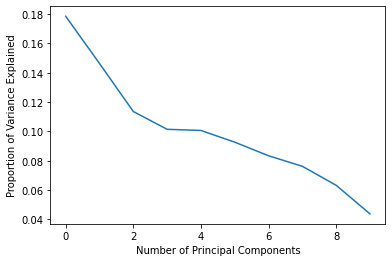

In [63]:
pca = PCA()
pca.fit(scaled_train_data)

# Generate the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [81]:
pca=PCA(n_components=3)

In [82]:
#again fit and transform the scaled data
pca.fit(scaled_train_data)

PCA(n_components=3)

In [83]:
# Print the explained variance of each principal component
print("Explained Variance: ", pca.explained_variance_)

Explained Variance:  [1.78569535 1.46364528 1.13609766]


In [84]:
# Print the sum of the explained variance
print("Sum of Explained Variance: ", pca.explained_variance_.sum())

Sum of Explained Variance:  4.385438288860913


# Let's start for LDA

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply FDA to reduce dimensionality
lda = LDA(n_components= 1)
x_train_lda = lda.fit_transform(scaled_train_data , y_train)
x_test_lda = lda.fit_transform(scaled_test_data , y_test)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#check the dimensions
scaled_train_data.shape


(36495, 10)

In [68]:
x_train_lda.shape

(36495, 1)

In [69]:
x_test_lda.shape

(12165, 1)

## Preparation of dataset is done... Now let's start modelling using various algorithm

## 1) Random forest

## (a) For Main scaled dataset

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create an instance of the RandomForestClassifier
clf = RandomForestClassifier()

# Fit the classifier to the train data
clf.fit(scaled_train_data, y_train)

# Make predictions on the test data
y_pred = clf.predict(scaled_test_data)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [73]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[11011   126]
 [  695   333]]


In [74]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9325113029182079


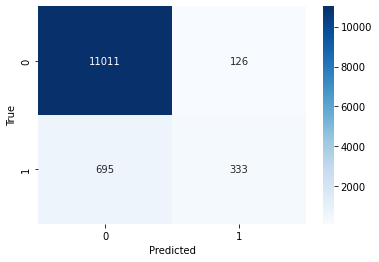

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

## (b) For data after PCA

In [86]:
# Fit the model on the new d-dimensional dataset
clf.fit(x_train_pca, y_train)

# Predict the class for the test set
y_pred1 = clf.predict(x_test_pca)

# Record the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred1)
acc1 = accuracy_score(y_test, y_pred1)
print("Confusion Matrix: \n", conf_matrix)
print("Accuracy: ", acc1)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix: 
 [[10725   412]
 [ 1006    22]]
Accuracy:  0.883436087135224


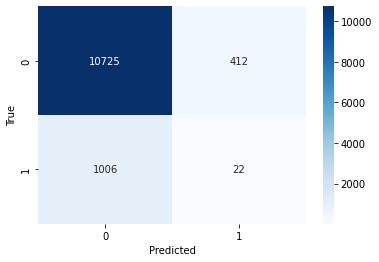

In [87]:
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

## (c) Using LDA

In [89]:
# Fit the model on the new d-dimensional dataset
clf.fit(x_train_lda, y_train)

# Predict the class for the test set
y_pred2 = clf.predict(x_test_lda)

# Record the confusion matrix and accuracy
conf_matrix1 = confusion_matrix(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)
print("Confusion Matrix: \n", conf_matrix1)
print("Accuracy: ", acc2)

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix: 
 [[10109  1028]
 [  805   223]]
Accuracy:  0.8493218249075216


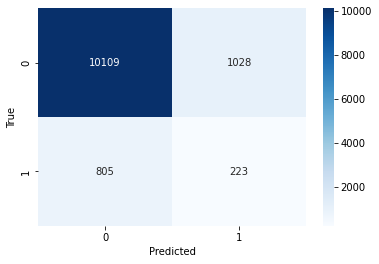

In [90]:
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

## 2) MLP : Multilayer Perceptron

## (a) Using Main scaled dataset

In [91]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Fit the model on the training data
mlp.fit(scaled_train_data, y_train)

# Use the model to predict on the test data
y_predN1 = mlp.predict(scaled_test_data)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_predN1))


c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.24952326
Iteration 2, loss = 0.23049538
Iteration 3, loss = 0.22790244
Iteration 4, loss = 0.22670016
Iteration 5, loss = 0.22521556
Iteration 6, loss = 0.22382713
Iteration 7, loss = 0.22239478
Iteration 8, loss = 0.22145805
Iteration 9, loss = 0.22099333
Iteration 10, loss = 0.22007147
Accuracy: 0.9251130291820797


c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [92]:
y_test.shape

(12165, 1)

In [93]:
# confusion matrix
conf_matrixN1 = confusion_matrix(y_test, y_predN1)
print("Confusion Matrix: \n", conf_matrixN1)

Confusion Matrix: 
 [[11071    66]
 [  845   183]]


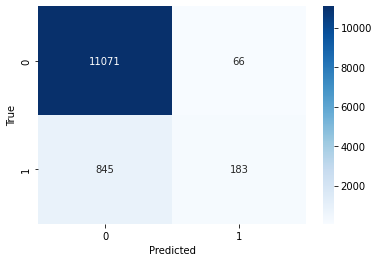

In [94]:
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrixN1, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

## (b) data with PCA

In [96]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Fit the model on the training data
mlp.fit(x_train_pca, y_train)

# Use the model to predict on the test data
y_predN2 = mlp.predict(x_test_pca)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_predN2))

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.25806191
Iteration 2, loss = 0.23989299
Iteration 3, loss = 0.23878894
Iteration 4, loss = 0.23757350
Iteration 5, loss = 0.23723527
Iteration 6, loss = 0.23687959
Iteration 7, loss = 0.23550673
Iteration 8, loss = 0.23493013
Iteration 9, loss = 0.23417700
Iteration 10, loss = 0.23351268
Accuracy: 0.8974928072338677


c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [97]:
# confusion matrix
conf_matrixN2 = confusion_matrix(y_test, y_predN2)
print("Confusion Matrix: \n", conf_matrixN2)

Confusion Matrix: 
 [[10903   234]
 [ 1013    15]]


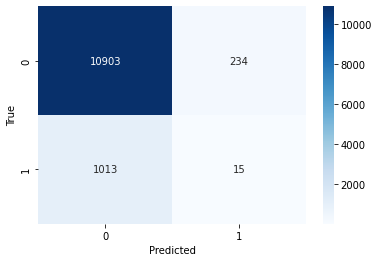

In [98]:
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrixN2, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()

## (c) data with LDA

In [99]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Fit the model on the training data
mlp.fit(x_train_lda, y_train)

# Use the model to predict on the test data
y_predN3 = mlp.predict(x_test_lda)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_predN3))

c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.25178928
Iteration 2, loss = 0.24366914
Iteration 3, loss = 0.24354148
Iteration 4, loss = 0.24349675
Iteration 5, loss = 0.24337362
Iteration 6, loss = 0.24333277
Iteration 7, loss = 0.24343284
Iteration 8, loss = 0.24322407
Iteration 9, loss = 0.24314345
Iteration 10, loss = 0.24325744
Accuracy: 0.9149198520345253


c:\users\katha\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [100]:
# confusion matrix
conf_matrixN3 = confusion_matrix(y_test, y_predN3)
print("Confusion Matrix: \n", conf_matrixN3)

Confusion Matrix: 
 [[11061    76]
 [  959    69]]


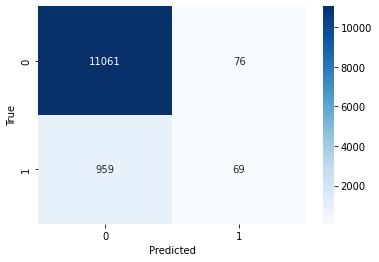

In [101]:
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrixN3, annot=True, fmt='d', cmap='Blues')

# Add labels for the x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()